<div style="text-align:center; font-family:Georgia, serif; background-color:#f5f5f5; padding:10px;">

  <h1 style="margin:0; padding:8px 0;">
    Using Bellman Equations 
  </h1>

  <h3 style="margin:0; padding:6px 0;">
    To find state values of an MDP
  </h3>

</div>


#### Goal

*To explore the basics of reinforcement learning by implementing Grid World Problem using  `Bellman Equation`*

Consider the `5x5 grid` below. We will use it to illustrate value functions for a simple finite MDP. 
- The cells of the grid correspond to the states of the environment. 
- At each cell, four actions are possible: `north`, `south`, `east`, and `west`
- Four actions deterministically cause the agent to move one cell in the respective direction on the grid. 
- Actions that would take the agent off the grid leave its location unchanged, but also result in a reward of -1.
- Other actions result in a reward of 0, except those that move the agent out of the special states A and B. 
- From state A, all four actions yield a reward of +10 and take the agent to A'.
- From state B, all actions yield a reward of +5  and take the agent to B'.

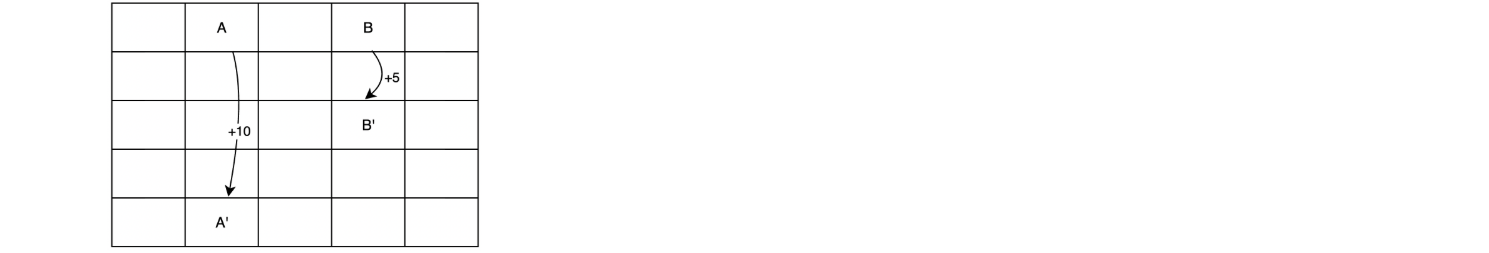

Assumtions:
- The agent selects all four actions with equal probability in all states.
- The rewards are discounted by a factor of 0.9

In [1]:
import numpy as np

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

In Python / NumPy grids:

- Row increases → move DOWN
- Row decreases → move UP
- Column increases → move RIGHT
- Column decreases → move LEFT

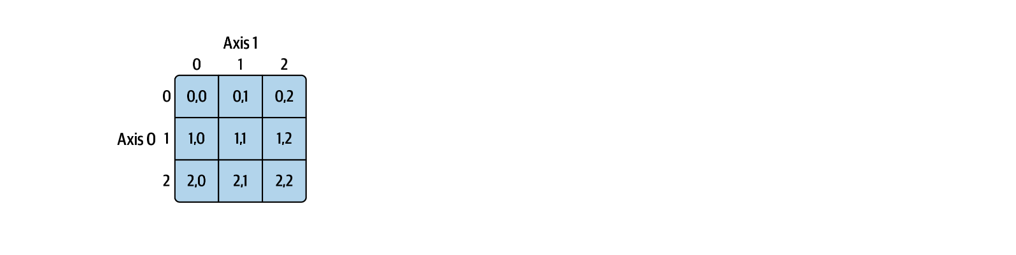

In [2]:
ACTIONS = [
    np.array([1, 0]),   #down
    np.array([-1, 0]),  #up
    np.array([0, 1]),   #right 
    np.array([0, -1]),  #left       
]

ACTION_PROB = 0.25

In [3]:
def step(state, action):
    reward = None     
    next_state = None    
    
    if state == A_POS:
        reward = 10
        next_state = A_PRIME_POS
    elif state == B_POS:
        reward = 5
        next_state = B_PRIME_POS
    else:
        next_state = (np.array(state) + action).tolist()
        x, y = next_state
        if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
            reward = -1.0
            next_state = state
        else:
            reward = 0.0
            
    return next_state, reward

### Bellman Expectation Equation

$$V(s) = \sum_{s'} P(s' | s, a) \left[ R(s, a, s') + \gamma V(s') \right]$$

- $s$: Current State
- $a$: Action
- $s'$: Next State
- $\pi(a|s)$: The probability of choosing action $a$ in state $s$.
- $P(s' | s, a)$: The probability of moving to $s'$ given state $s$ and action $a$.
- $R$: Reward
- $\gamma$: Discount factor (Gamma)

In [4]:
def bellman_update(value):
    new_value = np.zeros_like(value) #The numpy.zeros_like returns an array of zeros with the same shape and type as a given array

    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):  
            for action in ACTIONS:
                (next_i, next_j), reward = step([i, j], action)
                new_value[i, j] += 0.25 * ( reward + DISCOUNT * value[next_i, next_j] )
                
    return new_value

In [5]:
value_0 = np.zeros((WORLD_SIZE, WORLD_SIZE))

value_1 = bellman_update(value_0)

In [6]:
V = []
V.append(value_0)
V.append(value_1)

In [7]:
for i in range(2, 1000):
    V.append(bellman_update(V[i-1]))

In [8]:
print(f" Initial Iteration : \n{V[0]}\n ")
print(f" First Iteration : \n {V[1]} \n")
print(f" 100th Iteration : \n {V[99]} \n")
print(f" 500th Iteration : \n {V[499]} \n")
print(f" 1000th Iteration : \n {V[999]} \n")

 Initial Iteration : 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
 
 First Iteration : 
 [[-0.5  10.   -0.25  5.   -0.5 ]
 [-0.25  0.    0.    0.   -0.25]
 [-0.25  0.    0.    0.   -0.25]
 [-0.25  0.    0.    0.   -0.25]
 [-0.5  -0.25 -0.25 -0.25 -0.5 ]] 

 100th Iteration : 
 [[ 3.30899965  8.78929517  4.42762249  5.3223709   1.49218207]
 [ 1.52159138  2.99232117  2.25014326  1.90757502  0.54740602]
 [ 0.0508258   0.7381739   0.67311657  0.35818953 -0.40313783]
 [-0.97358899 -0.43549212 -0.35487896 -0.58560178 -1.18307177]
 [-1.85769724 -1.34522795 -1.22926395 -1.42291484 -1.97517574]] 

 500th Iteration : 
 [[ 3.30899634  8.78929186  4.42761918  5.32236759  1.49217876]
 [ 1.52158807  2.99231786  2.25013995  1.9075717   0.54740271]
 [ 0.05082249  0.73817059  0.67311326  0.35818621 -0.40314114]
 [-0.9735923  -0.43549543 -0.35488227 -0.58560509 -1.18307508]
 [-1.85770055 -1.34523126 -1.22926726 -1.42291815 -1.97517905]] 

 1000th Iteration 

In [9]:
ideal_value_1 = np.array([
    [-0.5 , 10.  , -0.25,  5.  , -0.5 ],
    [-0.25,  0.  ,  0.  ,  0.  , -0.25],
    [-0.25,  0.  ,  0.  ,  0.  , -0.25],
    [-0.25,  0.  ,  0.  ,  0.  , -0.25],
    [-0.5 , -0.25, -0.25, -0.25, -0.5 ]
]) 

In [10]:
V[1] == ideal_value_1

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [11]:
state_values = V[100]
state_values

array([[ 3.30899932,  8.78929484,  4.42762216,  5.32237057,  1.49218174],
       [ 1.52159105,  2.99232084,  2.25014293,  1.90757468,  0.54740569],
       [ 0.05082547,  0.73817357,  0.67311624,  0.35818919, -0.40313816],
       [-0.97358932, -0.43549245, -0.35487929, -0.58560211, -1.1830721 ],
       [-1.85769757, -1.34522828, -1.22926428, -1.42291517, -1.97517607]])

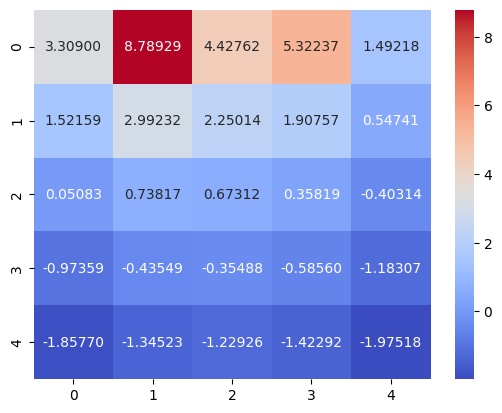

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(state_values, annot=True, fmt=".5f", cmap="coolwarm")

plt.show()

In [13]:
def get_optimal_path(start_state, goal_state, value_grid):
    path = []
    current_state = start_state
    visited = np.zeros((WORLD_SIZE, WORLD_SIZE))
    
    max_steps = 100
    
    for _ in range(max_steps):
        path.append(current_state)
        
        if current_state == goal_state:
            break
            

        best_value = -float('inf')
        best_next_state = current_state
        
        for action in ACTIONS:
            (next_i, next_j), _ = step(current_state, action)
            val = value_grid[next_i, next_j]
        
            if val > best_value and (visited[next_i, next_j]<=2):
                best_value = val
                best_next_state = [next_i, next_j]
                visited[current_state] = visited[current_state] +1
                
        current_state = best_next_state

    return path

path_trace = get_optimal_path([4, 4], [0, 0], state_values)
print("Path taken:", path_trace)

Path taken: [[4, 4], [3, 4], [2, 4], [1, 4], [1, 3], [0, 3], [2, 3], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4], [2, 4]]
